In [1]:
import pandas as pd
import numpy as np
import arff
import seaborn as sns

import matplotlib.pyplot as plt

### Load data

In [2]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [3]:
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower","VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"]).astype({"IDpol": int, "ClaimNb": int, "VehPower": int, "VehAge": int,"DrivAge": int, "BonusMalus": int, "Density": int})
df_freq.set_index("IDpol", inplace=True)

In [4]:
data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"]).astype({"IDpol": int})
#df_sev.set_index("IDpol", inplace=True)

# 1. Exploratory Data Analysis

In [5]:
print(f"Full dataset shapes are {df_freq.shape} and {df_sev.shape}")

Full dataset shapes are (678013, 11) and (26639, 2)


In [6]:
df_freq.head(3)

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,,
1,1,0.10,'D',5,0,55,50,'B12',Regular,1217,'R82'
3,1,0.77,'D',5,0,55,50,'B12',Regular,1217,'R82'
5,1,0.75,'B',6,2,52,50,'B12',Diesel,54,'R22'


In [7]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678013 entries, 1 to 6114330
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ClaimNb     678013 non-null  int32  
 1   Exposure    678013 non-null  float64
 2   Area        678013 non-null  object 
 3   VehPower    678013 non-null  int32  
 4   VehAge      678013 non-null  int32  
 5   DrivAge     678013 non-null  int32  
 6   BonusMalus  678013 non-null  int32  
 7   VehBrand    678013 non-null  object 
 8   VehGas      678013 non-null  object 
 9   Density     678013 non-null  int32  
 10  Region      678013 non-null  object 
dtypes: float64(1), int32(6), object(4)
memory usage: 44.0+ MB


- There are no missing values
- We have 7 numerical and 4 categorical features

In [8]:
df_freq.describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.00,678013.00,678013.00,678013.00,678013.00,678013.00,678013.00
mean,0.05,0.53,6.45,7.04,45.50,59.76,1792.42
std,0.24,0.36,2.05,5.67,14.14,15.64,3958.65
min,0.00,0.00,4.00,0.00,18.00,50.00,1.00
25%,0.00,0.18,5.00,2.00,34.00,50.00,92.00
50%,0.00,0.49,6.00,6.00,44.00,50.00,393.00
75%,0.00,0.99,7.00,11.00,55.00,64.00,1658.00
max,16.00,2.01,15.00,100.00,100.00,230.00,27000.00


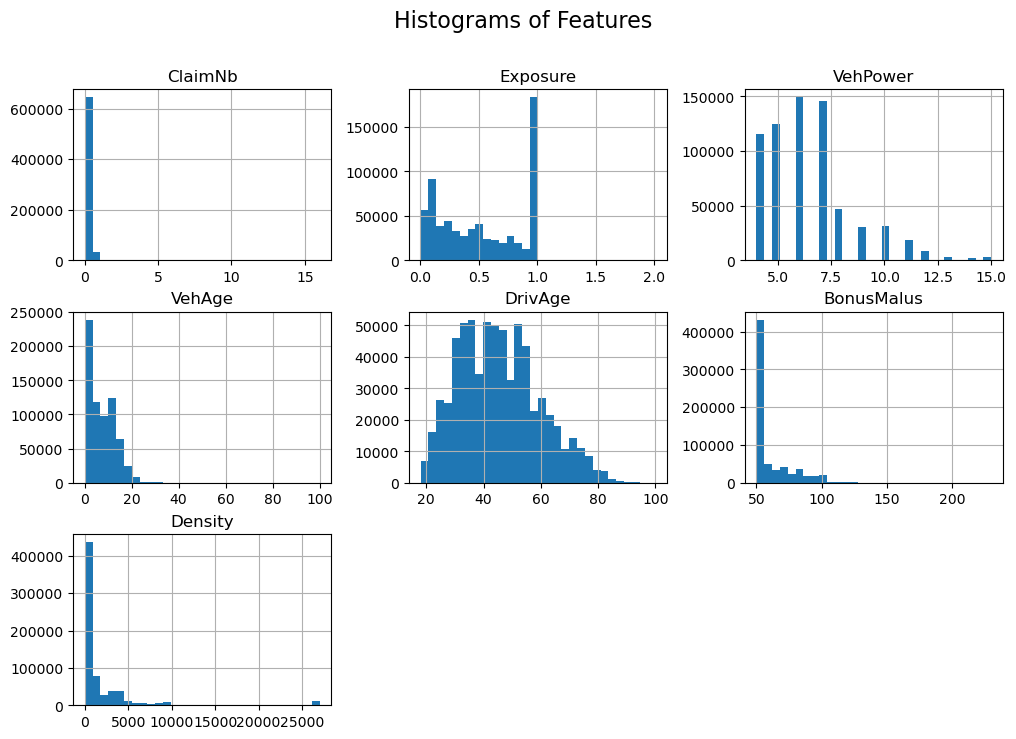

In [9]:
df_freq.hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

In [10]:
df_sev.head(3)

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11


In [11]:
df_sev.describe()

,IDpol,ClaimAmount
count,26639.00,26639.00
mean,2279863.83,2278.54
std,1577201.81,29297.48
min,139.00,1.00
25%,1087642.50,686.81
50%,2137413.00,1172.00
75%,3180162.00,1228.08
max,6113971.00,4075400.56


<Figure size 1200x800 with 0 Axes>

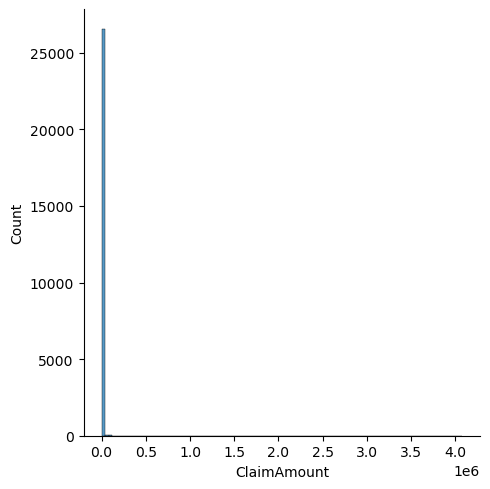

In [12]:
plt.figure(figsize=(12, 8))
sns.displot(df_sev['ClaimAmount'], bins=100)

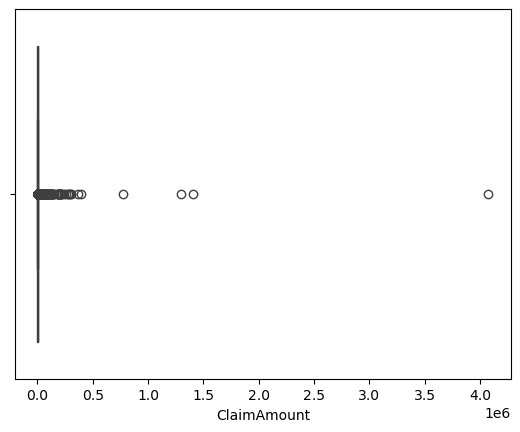

In [13]:
sns.boxplot(x=df_sev['ClaimAmount'])
plt.show()

# 2. Feature Engineering

### Join both tables to see the claims per police

In [14]:
df = df_freq.drop(columns=['ClaimNb']).merge(df_sev, on="IDpol", how='inner').fillna(0).groupby(["IDpol", "Exposure", "Area", "VehPower","VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"], as_index=False).agg(ClaimAmount=("ClaimAmount", "sum"))
df["ClaimAmount"] = df["ClaimAmount"] / df["Exposure"]
df = df.drop(columns=["Exposure", "Region"])  # Exposure is already part of ClaimAmount and Region is too specific and already covered by Area
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        24944 non-null  int32  
 1   Area         24944 non-null  object 
 2   VehPower     24944 non-null  int32  
 3   VehAge       24944 non-null  int32  
 4   DrivAge      24944 non-null  int32  
 5   BonusMalus   24944 non-null  int32  
 6   VehBrand     24944 non-null  object 
 7   VehGas       24944 non-null  object 
 8   Density      24944 non-null  int32  
 9   ClaimAmount  24944 non-null  float64
dtypes: float64(1), int32(6), object(3)
memory usage: 1.3+ MB


In [15]:
df.sort_values(by='ClaimAmount')

,IDpol,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,ClaimAmount
4970,1031713,'A',9,11,56,55,'B1',Regular,26,1.00
4280,175914,'E',5,12,37,50,'B5',Regular,3374,1.49
18917,3191712,'A',6,3,58,50,'B2',Regular,24,1.59
17044,3120081,'B',6,10,53,50,'B1',Diesel,93,1.74
13395,2188088,'A',10,4,57,50,'B12',Diesel,10,2.00
...,...,...,...,...,...,...,...,...,...,...
12729,2141337,'D',4,14,18,100,'B2',Regular,863,4066164.38
15353,3025890,'A',7,1,36,50,'B12',Diesel,38,4255057.11
16348,3083780,'E',7,15,21,100,'B2',Diesel,2415,9102500.00
1139,53865,'E',6,1,23,80,'B2',Regular,2456,18307366.00


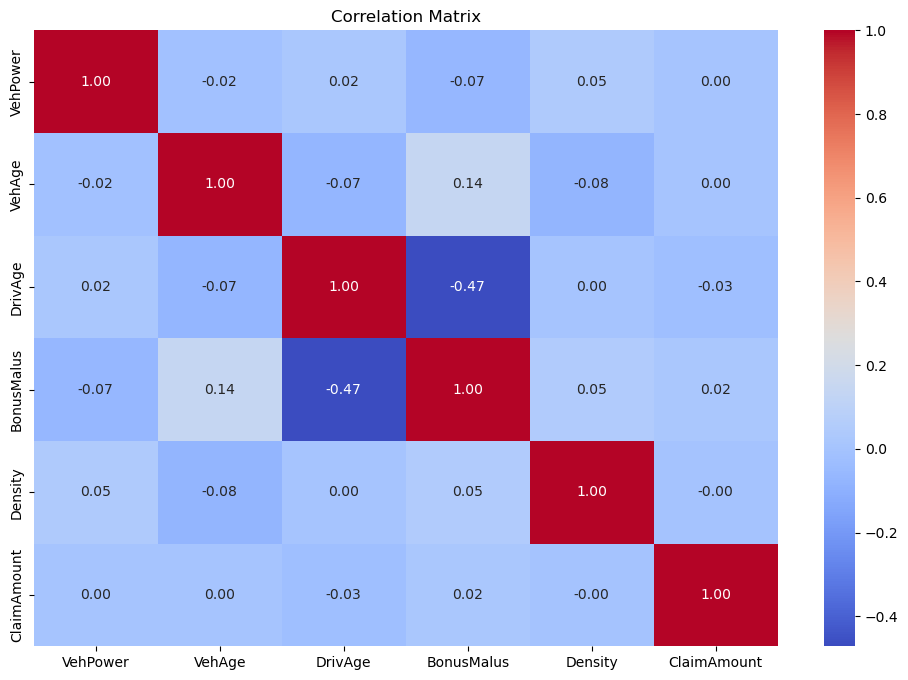

In [16]:
#correlation_matrix = pd.get_dummies(df).corr()
correlation_matrix = df[["VehPower","VehAge","DrivAge", "BonusMalus", "Density", "ClaimAmount"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There are only very weak correlations between ClaimAmount and other variables. We need to remove outliers.

In [17]:
# remove outliers using IQR for claim amount
q1 = df["ClaimAmount"].quantile(0.25)
q3 = df["ClaimAmount"].quantile(0.75)
iqr = q3 - q1

lower = max(q1 - 1.5 * iqr, 0)
upper = q3 + 2 * iqr  # use 2 because of skewedness
print(f"Only allow ClaimAmount values between {lower:.2f} and {upper:.2f}")

Only allow ClaimAmount values between 0.00 and 7800.03


In [18]:
df_no_outliers = df[(df["ClaimAmount"] >= lower) & (df["ClaimAmount"] <= upper) & (df["DrivAge"] <= 80) & (df["VehAge"] <= 25)]
df_no_outliers.sort_values(by="ClaimAmount")

,IDpol,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,ClaimAmount
4970,1031713,'A',9,11,56,55,'B1',Regular,26,1.00
4280,175914,'E',5,12,37,50,'B5',Regular,3374,1.49
18917,3191712,'A',6,3,58,50,'B2',Regular,24,1.59
17044,3120081,'B',6,10,53,50,'B1',Diesel,93,1.74
13395,2188088,'A',10,4,57,50,'B12',Diesel,10,2.00
...,...,...,...,...,...,...,...,...,...,...
16594,3097214,'D',4,10,54,63,'B6',Regular,1466,7777.00
23724,5056276,'E',5,2,25,80,'B2',Regular,6924,7777.27
9598,1197759,'F',7,7,38,72,'B1',Regular,10156,7777.40
10015,2026085,'E',5,8,23,125,'B2',Diesel,6127,7785.77


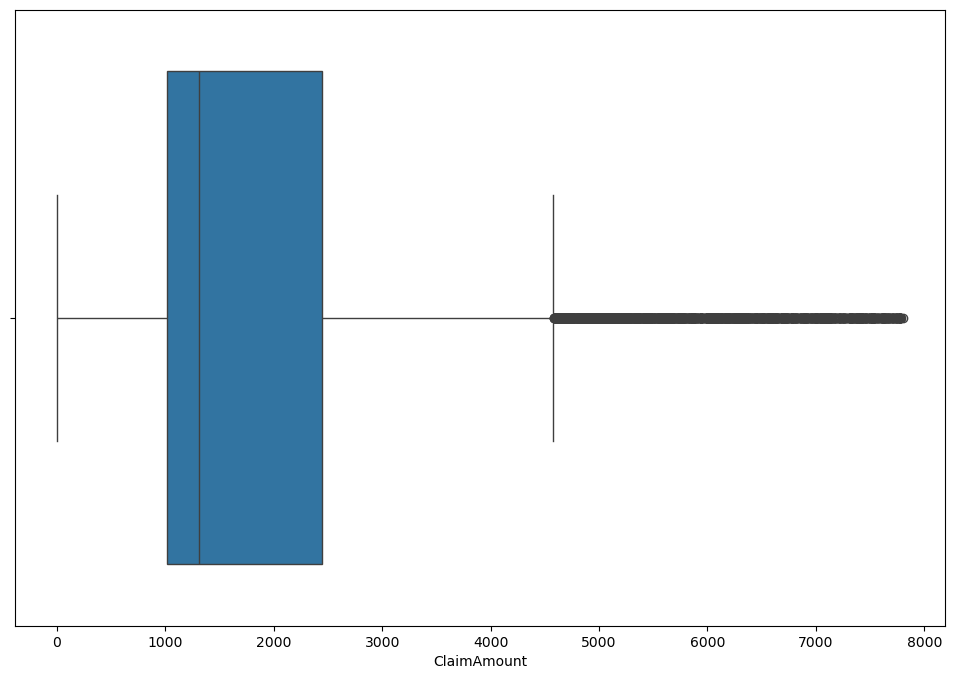

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_no_outliers['ClaimAmount'])
plt.show()

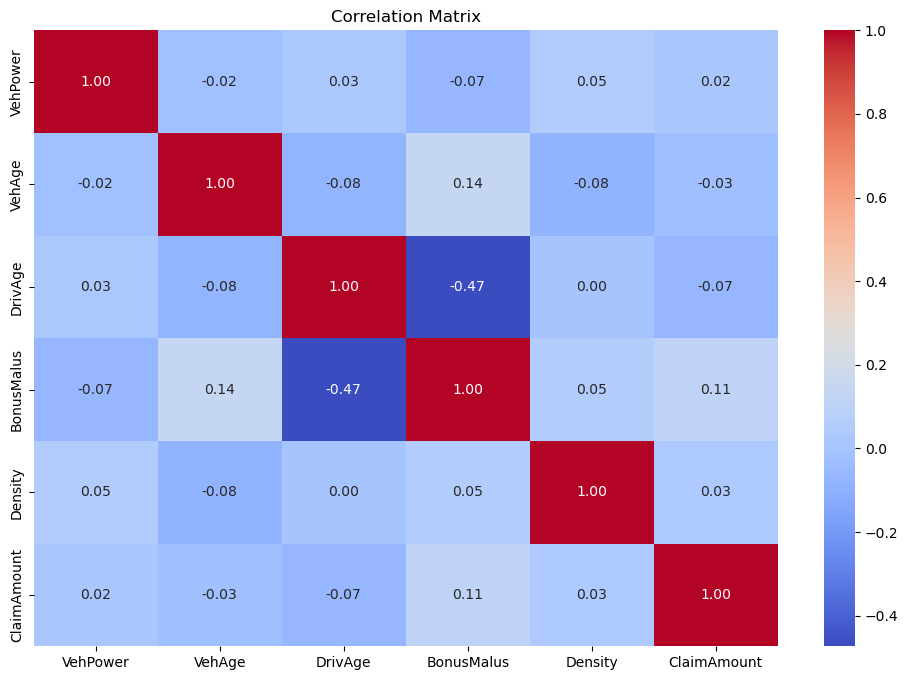

In [20]:
correlation_matrix = df_no_outliers[["VehPower","VehAge","DrivAge", "BonusMalus", "Density", "ClaimAmount"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

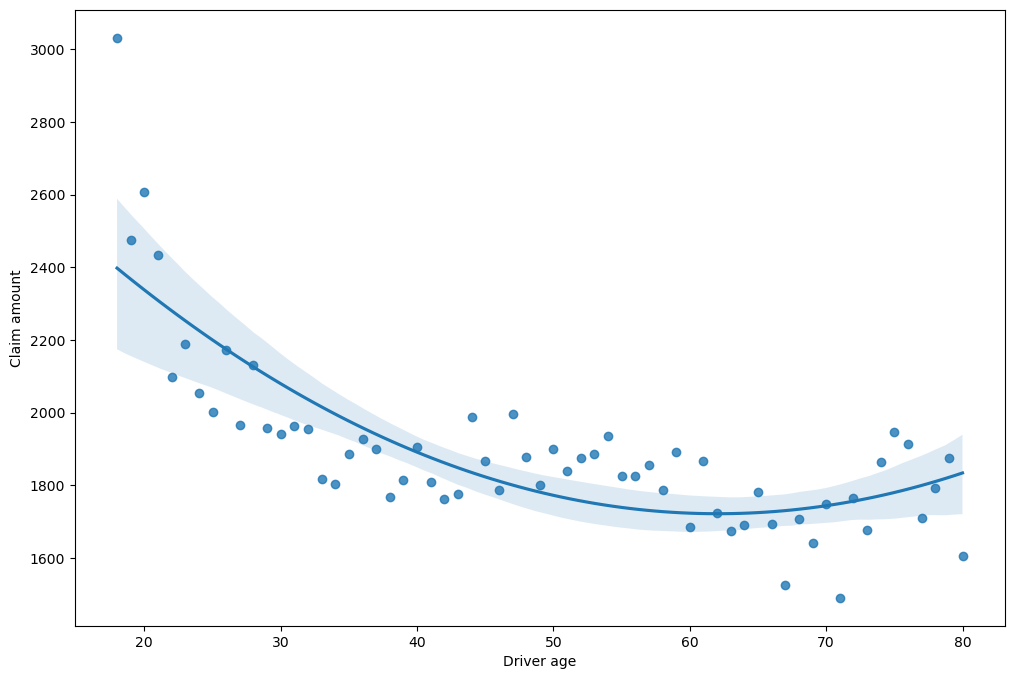

In [21]:
age_df = df_no_outliers.groupby('DrivAge', as_index=False)['ClaimAmount'].mean()

plt.figure(figsize=(12, 8))

# Create a scatter plot with hue, style, and size
sns.regplot(x='DrivAge', y='ClaimAmount', data=age_df, order=2)

# Set plot title and labels
plt.xlabel('Driver age')
plt.ylabel('Claim amount')

# Show plot
plt.show()

In [22]:
df_dummies = pd.get_dummies(df_no_outliers, columns=["VehGas", "Area"], prefix="", drop_first=True)
df_dummies

,IDpol,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,ClaimAmount,_Regular,_'B',_'C',_'D',_'E',_'F'
0,139,7,1,61,50,'B12',27000,404.00,True,False,False,False,False,True
5,606,10,6,54,50,'B12',583,2190.64,False,False,False,True,False,False
6,622,5,0,34,64,'B12',1565,1863.96,True,False,False,True,False,False
7,811,5,0,44,50,'B12',3317,1278.92,True,False,False,False,True,False
8,830,4,10,24,105,'B1',3064,2121.69,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,6112760,13,0,48,50,'B12',171,5432.31,True,False,True,False,False,False
24933,6112797,6,8,28,60,'B2',2252,1647.23,False,False,False,False,True,False
24935,6113182,4,0,36,57,'B12',130,4642.76,True,False,True,False,False,False
24939,6113521,4,1,26,60,'B12',311,7357.78,False,False,True,False,False,False


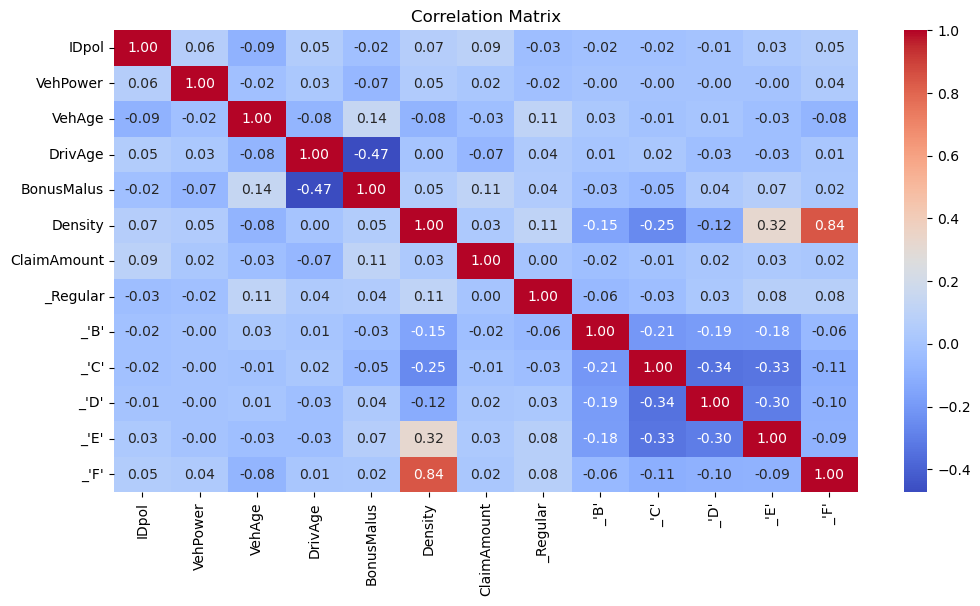

In [23]:
correlation_matrix = df_dummies.drop(columns=["VehBrand"]).corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# we can drop VehGas as it has negligible correlation
df_no_outliers = df_no_outliers.drop(columns=["VehGas"])

# we encode region with one-hot because it is a nominal feature
df_no_outliers = pd.get_dummies(df_no_outliers, columns=["Area"], prefix="", drop_first=True)

df_no_outliers

,IDpol,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,ClaimAmount,_'B',_'C',_'D',_'E',_'F'
0,139,7,1,61,50,'B12',27000,404.00,False,False,False,False,True
5,606,10,6,54,50,'B12',583,2190.64,False,False,True,False,False
6,622,5,0,34,64,'B12',1565,1863.96,False,False,True,False,False
7,811,5,0,44,50,'B12',3317,1278.92,False,False,False,True,False
8,830,4,10,24,105,'B1',3064,2121.69,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,6112760,13,0,48,50,'B12',171,5432.31,False,True,False,False,False
24933,6112797,6,8,28,60,'B2',2252,1647.23,False,False,False,True,False
24935,6113182,4,0,36,57,'B12',130,4642.76,False,True,False,False,False
24939,6113521,4,1,26,60,'B12',311,7357.78,False,True,False,False,False


# 3. Model Selection
This is a regression problem with numerical and categorical variables. We also want the resulting model to be interpretable. Therefore, linear regression and tree-based methods are suitable. The metric to calculate our pricing-error is the difference between premiums and claims for all polices:
$$ Err = \frac{1}{n} \cdot \frac{n_{crashers}}{n_{customers}} \sum_{i=1}^{n} premium_{i} - claimAmount_{i}$$
We choose random forests because they are a simple, interpretable, and robust model which is able to handle categorical variables.

# 4. Model building

In [25]:
df_no_outliers

,IDpol,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,ClaimAmount,_'B',_'C',_'D',_'E',_'F'
0,139,7,1,61,50,'B12',27000,404.00,False,False,False,False,True
5,606,10,6,54,50,'B12',583,2190.64,False,False,True,False,False
6,622,5,0,34,64,'B12',1565,1863.96,False,False,True,False,False
7,811,5,0,44,50,'B12',3317,1278.92,False,False,False,True,False
8,830,4,10,24,105,'B1',3064,2121.69,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,6112760,13,0,48,50,'B12',171,5432.31,False,True,False,False,False
24933,6112797,6,8,28,60,'B2',2252,1647.23,False,False,False,True,False
24935,6113182,4,0,36,57,'B12',130,4642.76,False,True,False,False,False
24939,6113521,4,1,26,60,'B12',311,7357.78,False,True,False,False,False


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [27]:
X = df_no_outliers.drop(columns=["ClaimAmount", "VehBrand"])
y = df_no_outliers["ClaimAmount"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
def metric(data, prediction):
    n = len(data)
    return sum(y2 - y1 for y1, y2 in zip(data, prediction)) / n

In [30]:
print(f"Error is {metric(y_test, y_pred):.2f}€ per police")

Error is 90.29€ per police


In [32]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances

,feature,importance
0,IDpol,0.31
5,Density,0.20
3,DrivAge,0.16
2,VehAge,0.12
4,BonusMalus,0.09
1,VehPower,0.09
8,_'D',0.01
7,_'C',0.01
6,_'B',0.01
9,_'E',0.01


## Further improvements
- Decorrelate age and BonusMalus
- Compare performance of other models, such as regression and perform L1 or L2 regularization
- Perform k-fold cross-validation
- Further analyze remaining features for outliers, correlations etc.
- Investigate vehicle brand
- Apply our metric in the training phase of the model
- Handle the whole dataset for verification
- Tune hyperparameters